# Wage Structure

### Input Variables:

$G$ Max number of tenure workers  
$\beta_w$ Increase of wage each period of tenure  
$\alpha_w$ Starting wage

### Output Variables:

$\mathbb{W}$ Grid with the Wage of workers for each tenure

## Function:

As of: 28/04/2015

In [1]:
function Wages(G::Int,Beta::Float64,Alpha::Float64)
    
    """Create the Wage Structure of an Economy.

    Parameters
    ----------
    G    : Max Number of Tenure Workers
    Beta : Increase of wage each period of tenure 
    Alpha: Starting wage
    
    Parameters
    ----------
    W : Grid with the Wage of workers for each tenure
    """
    
    TGrid=[0:G-1];
    
    W=TGrid*Beta+Alpha;
    
    return W
    
end

Wages (generic function with 1 method)

In [2]:
61/71

0.8591549295774648

## Growing Size

$G$

In [3]:
β=0.1;
α=0.8;

## Time

Max Size and Sample Size

In [4]:
Ms=400;
Ss=50;

### Test

In [5]:
# Warm Up Run
G=10;
Wages(G,β,α)   #

t=[1.0:Ms-1];
b=[1.0:Ss];

for i=2:Ms
    
    for j=1:Ss
        
        a=@elapsed Wages(i,β,α)
        b[j]=a;
        
    end
    
    t[i-1]=minimum(b);
    
end

### Plot Result

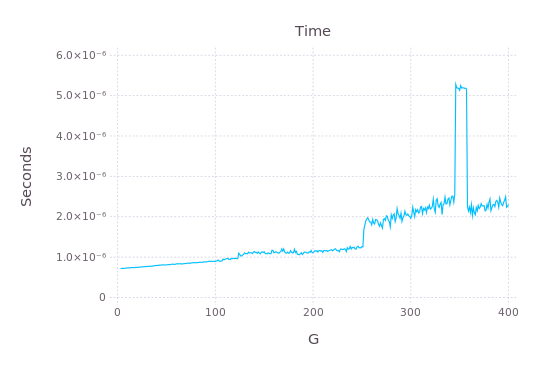

In [6]:
using Gadfly

plot(x=[2:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [7]:
Ms=400;
Ss=50;

### Test

In [8]:
# Warm Up Run
G=10;
Wages(G,β,α)   #

t=[1.0:Ms-1];
b=[1.0:Ss];

for i=2:Ms
    
    for j=1:Ss
        
        a=@allocated Wages(i,β,α)
        b[j]=a;
        
    end
    
    t[i-1]=minimum(b);
    
end

### Plot Result

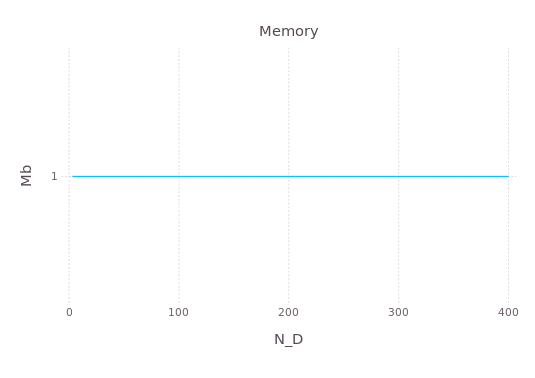

In [9]:
plot(x=[2:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Mb"),Guide.title("Memory"), Geom.line)

## Profile

In [10]:
G=12;
β=0.1;
α=0.8;

Sample Size

In [13]:
Rep=10000;

In [14]:
Profile.clear()
@profile (for i=1:Rep;Wages(G,β,α);end)
Profile.print()

3 task.jl; anonymous; line: 340
 3 ...3/IJulia/src/IJulia.jl; eventloop; line: 123
  3 ...src/execute_request.jl; execute_request_0x535c5df2; line: 160
   3 loading.jl; include_string; line: 97
    3 profile.jl; anonymous; line: 2
     1 In[1]; Wages; line: 18
      1 array.jl; .*; line: 759
